# Prefácio

## O que é Data Science?

O Data Science está na interseção de:

- Habilidades de Hacker

- Conhecimento de estatística e matemática

- Especialidade no assunto

Ciência é sobre descoberta e criação de conhecimento.

# Capítulo 1

- Discussão sobre os dados em nossas vidas.

## Cientistas de Dados são:

- Um pouco estatístico e um pouco engenheiro de software.

- Alguém que extrai conhecimentos de dados desorganizados.

## Mãos a Obra

- Identificar os "conectores-chave" entre os cientistas de dados. 

- Lista de amigos para cada usuario

- Número médio de conexões

- As pessoas mais conectadas

- Grau de centralidade (identificar as pessoas que são centrais para a rede)

In [3]:
# Dados disponíveis

users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [4]:
# ANTES
for user in users[:2]:
    print(user)

{'id': 0, 'name': 'Hero'}
{'id': 1, 'name': 'Dunn'}


In [5]:
# adicionando a chave friends para cada usuario e 
# colocando como valor uma lista vazia
for user in users:
    user['friends'] = []

In [6]:
# DEPOIS
for user in users[:2]:
    print(user)

{'id': 0, 'name': 'Hero', 'friends': []}
{'id': 1, 'name': 'Dunn', 'friends': []}


In [8]:
users[0]

{'id': 0, 'name': 'Hero', 'friends': []}

In [9]:
def find_user(_id):
    "devolve a posicao do usuario na lista"
    for i in range(len(users)):
        if users[i]["id"] == _id:
            return i
    return "user not found"

In [13]:
users[find_user(0)]

{'id': 0, 'name': 'Hero', 'friends': []}

In [5]:
find_user(13)

'user not found'

In [15]:
friendships[:3]

[(0, 1), (0, 2), (1, 2)]

In [16]:
for i, j in friendships:
    users[find_user(i)]["friends"].append(users[find_user(j)])
    users[find_user(j)]["friends"].append(users[find_user(i)])

In [17]:
def number_of_friends(user: dict):
    """retorna o numero de amigos do usuario"""
    return len(user["friends"])

In [18]:
total_conections = sum(number_of_friends(user) for user in users)
total_conections

24

In [19]:
num_users = len(users)
num_users

11

In [10]:
avg_connections = total_conections / num_users
avg_connections

2.1818181818181817

In [20]:
num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]

In [21]:
num_friends_by_id[0]

(0, 2)

In [22]:
sorted(num_friends_by_id, key=lambda x:x[1], reverse=True)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1),
 (10, 0)]

In [31]:
from graphviz import Graph, Digraph

In [27]:
sorted(friendships, key=lambda x: x[0], reverse=True)

[(8, 9),
 (7, 8),
 (6, 8),
 (5, 6),
 (5, 7),
 (4, 5),
 (3, 4),
 (2, 3),
 (1, 2),
 (1, 3),
 (0, 1),
 (0, 2)]

In [37]:
g = Digraph('G', filename='digrafo_amizade.gv', engine = 'sfdp')
for i, j in sorted(friendships, key=lambda x: x[0], reverse=True):
    g.edge(str(i), str(j))
g.view()

'digrafo_amizade.gv.pdf'

In [36]:
g = Graph('G', filename='grafo_amizade.gv', engine = 'sfdp')
for i, j in sorted(friendships, key=lambda x: x[0], reverse=True):
    g.edge(str(i), str(j))
g.view()

'grafo_amizade.gv.pdf'

In [25]:
from graphviz import Graph
g = Graph('Conexoes_de_Amigos', comment = "Execricio_Pag5", filename = 'Conexoes_Amigos.gv', engine = 'sfdp')
for i, j in friendships:
    g.edge(str(i), str(j), color = "red", penwidth = "3.0")
g.view()

'Conexoes_Amigos.gv.pdf'

# Maos a Obra - Parte 2

- Cientistas de Dados Que Você Talvez Conheça



In [38]:
friendships

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 9)]

In [174]:
lista_amigos_de_amigos = []
for _id in [x['id'] for x in users[0]['friends']]:
    lista_amigos_de_amigos.extend([x['id'] for x in users[_id]['friends']])

In [175]:
lista_amigos_de_amigos

[0, 2, 3, 0, 1, 3]

In [39]:
def friends_of_friend_ids_bad(user):
    return [foaf['id']
            for friend in user['friends']
            for foaf in friend['friends']]

In [42]:
friends_of_friend_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [43]:
def m_friends_of_friend_ids_bad(user):
    lista_amigos_de_amigos = []
    for _id in [x['id'] for x in users[user]['friends']]:
        lista_amigos_de_amigos.extend([x['id'] for x in users[_id]['friends']])
    return lista_amigos_de_amigos

In [44]:
friends_of_friend_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [46]:
[x['id'] for friend in users[0]['friends'] for x in friend['friends']]

[0, 2, 3, 0, 1, 3]

In [47]:
print([friend['id'] for friend in users[0]['friends']])
print([friend['id'] for friend in users[1]['friends']])
print([friend['id'] for friend in users[2]['friends']])

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [48]:
def not_the_same(user, other_user):
    return user['id'] != other_user['id']

In [49]:
def not_friends(user, other_user):
    return all(not_the_same(friend, other_user) for friend in user["friends"])

In [53]:
from collections import Counter

In [50]:
def friends_of_friends_ids(user):
    return Counter(foaf['id']
                   for friend in user['friends']
                   for foaf in friend['friends']
                   if not_the_same(user, foaf)
                   and not_friends(user, foaf)) 

In [51]:
not_friends(users[2], users[4])

True

In [54]:
friends_of_friends_ids(users[0])

Counter({3: 2})

In [55]:
def m_friends_of_friends_ids(usuario):
    return Counter([x for x in friends_of_friend_ids_bad(usuario) if x not in [ amigo['id']
                      for amigo in usuario['friends']] and x != usuario['id']])


In [56]:
m_friends_of_friends_ids(users[3])

Counter({0: 2, 5: 1})

# Competência significativa

- Encontrar usuários com interesses similares

In [57]:
def data_scientists_who_like(target_interests):
    return [ x for x, y in interests if y == target_interests]

In [58]:
data_scientists_who_like('regression')

[3, 4]

In [59]:
from collections import defaultdict

In [60]:
user_ids_by_interest = defaultdict(list)
user_ids_by_interest

defaultdict(list, {})

In [62]:
interests[:3]

[(0, 'Hadoop'), (0, 'Big Data'), (0, 'HBase')]

In [63]:
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

In [64]:
user_ids_by_interest['Java']

[0, 5, 9]

In [73]:
interests_by_user_id = defaultdict(list)

In [74]:
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [75]:
interests_by_user_id[0]

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']

In [76]:
user_ids_by_interest['Java']

[0, 5, 9]

In [77]:
interests_by_user_id.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [78]:
usuarios_com_interesse = defaultdict(list) 
for user in users:
    print(user['id'], interests_by_user_id[user['id']])
    usuario = user['id']
    for interesse in interests_by_user_id[usuario]:
        usuarios_com_interesse[interesse].append(usuario) 

0 ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
1 ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
2 ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
3 ['R', 'Python', 'statistics', 'regression', 'probability']
4 ['machine learning', 'regression', 'decision trees', 'libsvm']
5 ['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
6 ['statistics', 'probability', 'mathematics', 'theory']
7 ['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
8 ['neural networks', 'deep learning', 'Big Data', 'artificial intelligence']
9 ['Hadoop', 'Java', 'MapReduce', 'Big Data']
10 []


Agora fica facil descobrir quem possui os maiores interesses em comum com um certo usuario.

-> usuario

-> [(pessoa, ranking), ]

Código do livro:

1. Itera sobre os interesses do usuário

2. Para cada interesse, itera sobre os outros usuarios com aquele interesse

3. Mantem a contagem de quantas vezes vemos cada usuario

In [79]:
Counter([2,3,4,4,4,5,5,6,6,6,6])

Counter({2: 1, 3: 1, 4: 3, 5: 2, 6: 4})

In [81]:
interests_by_user_id[usuario]

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']

In [127]:
usuario = 0
lista_ids_com_interesses_em_comum = []
for interesse in interests_by_user_id[usuario]:
     lista_ids_com_interesses_em_comum.extend(user_ids_by_interest[interesse])
    #print(user_ids_by_interest[interesse])
lista_ids_com_interesses_em_comum

[0, 9, 0, 8, 9, 0, 1, 0, 5, 9, 0, 0, 0, 1]

In [128]:
Counter([user for user in lista_ids_com_interesses_em_comum if user != usuario])
# teste
# pro usuario 0 recomende o 9
# pro usuario 1 recomende o 0
# pro usuario 2 recomende o 3, 5, 7
# pro usuario 3 recomende o 5, 6
            

Counter({9: 3, 8: 1, 1: 2, 5: 1})

In [114]:
def most_common_interests_with(user_id):
    return Counter([interested_user_id
                    for interest in interests_by_user_id[user_id]
                    for interested_user_id in user_ids_by_interest[interest]
                    if interested_user_id != user_id])

In [126]:
most_common_interests_with(0)

Counter({9: 3, 8: 1, 1: 2, 5: 1})

### Salarios


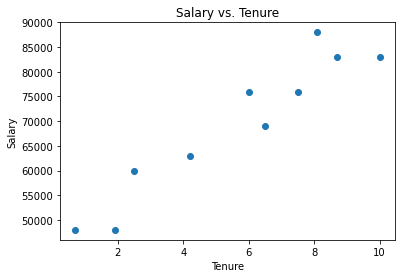

In [141]:
import matplotlib.pyplot as plt
import pandas as pd
df_salaries_and_tenures = pd.DataFrame(salaries_and_tenures)
df_salaries_and_tenures.index = df_salaries_and_tenures[1]
df_salaries_and_tenures.drop(columns = [1], inplace = True)
plt.scatter(df_salaries_and_tenures.index, df_salaries_and_tenures)
plt.title('Salary vs. Tenure') 
plt.ylabel('Salary')
plt.xlabel('Tenure')
plt.show()

In [130]:
salary_by_tenure = defaultdict(list)

In [131]:
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

In [132]:
salary_by_tenure

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

In [133]:
avarage_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [134]:
avarage_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [142]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return 'more than five'

In [143]:
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [144]:
salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [146]:
avarage_salary_by_bucket = {
    tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [147]:
avarage_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}